In [1]:
## Abstractions
import numpy as np
import pandas as pd

## Plotting
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pylab as pl

## Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Models
from sklearn.linear_model import LogisticRegression

## Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import det_curve

## Timing
import time

# Model
from BayesianLogisticRegression_SOSGD import MAPEstimator

Import Data

In [2]:
headers = ['molecule_name', 'conformation_name']
for i in range(1, 167):
    name = 'f%i' % i
    headers.append(name)
headers.append('class')

In [3]:
# headers = pd.read_csv('clean2.info')
df = pd.read_csv('src/clean2.data')
df.columns = headers

In [4]:
X = np.asarray(df.iloc[:,2:-1])
y = np.asarray(df.iloc[:,-1])

Standard Scaler

In [5]:
X_std = StandardScaler().fit_transform(X)

Train and Test Model

In [6]:
clf = MAPEstimator(w_D = np.zeros(166), solver='fo', step_size=0.0001, alpha=0.1, max_iter = 1000, tol = 1e-4)
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [23]:
score = clf.score(X_std, y, 0.5)
score

0.9339093527360922

In [19]:
x_axis = []
y_axis = []
for i in np.linspace(0.0,1,100):
    score = clf.score(X_std, y, i)
    x_axis.append(i)
    y_axis.append(score)
    print(i,'\t\t\t',score)

0.0 			 0.15400939821130816
0.010101010101010102 			 0.4873427315446415
0.020202020202020204 			 0.586933454600576
0.030303030303030304 			 0.6451417310898894
0.04040404040404041 			 0.6868273457632257
0.05050505050505051 			 0.7309383052902835
0.06060606060606061 			 0.7670153099893892
0.07070707070707072 			 0.7906624223131726
0.08080808080808081 			 0.8117326057298773
0.09090909090909091 			 0.8352281340003032
0.10101010101010102 			 0.8579657420039412
0.11111111111111112 			 0.8763074124602092
0.12121212121212122 			 0.8838866151280885
0.13131313131313133 			 0.892526906169471
0.14141414141414144 			 0.8982871001970593
0.15151515151515152 			 0.9019251174776414
0.16161616161616163 			 0.9076853115052297
0.17171717171717174 			 0.9111717447324541
0.18181818181818182 			 0.91268758526603
0.19191919191919193 			 0.916022434439897
0.20202020202020204 			 0.9195088676671214
0.21212121212121213 			 0.9216310444141277
0.22222222222222224 			 0.9229953008943459
0.23232323232323235 			 0.92

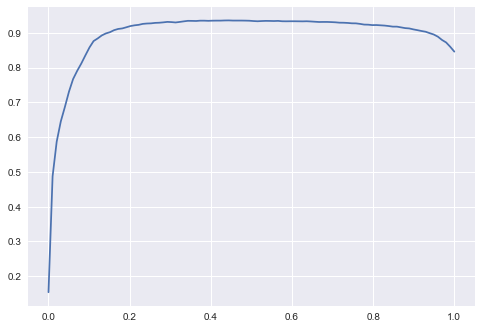

In [20]:
plt.plot(x_axis, y_axis)

In [67]:
x_axis = []
y_axis = []
for i in np.logspace(-6,-5,2):
    clf = MAPEstimator(w_D = np.zeros(166), solver='fo', step_size=0.0001, alpha=1, max_iter = 1000, tol = 0.00001)
    clf.fit(X_std,y)
    score = clf.score(X_std, y, 0.5)
    x_axis.append(i)
    y_axis.append(score)
#     print(i,'\t\t\t',score)

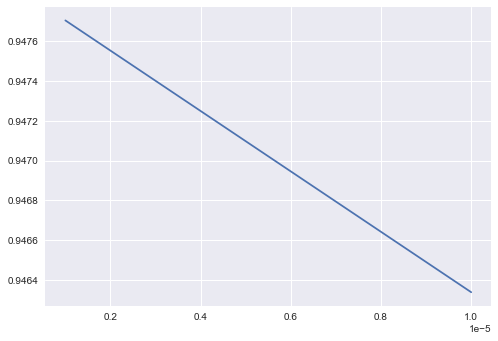

In [68]:
plt.plot(x_axis, y_axis)

In [9]:
np.dot(clf.w, np.hstack((1, X_std[1]))) 

3.2421905031475595

In [10]:
(np.sum(y==0)) / len(y)

0.8459906017886918

In [11]:
clf.iteration_count

167

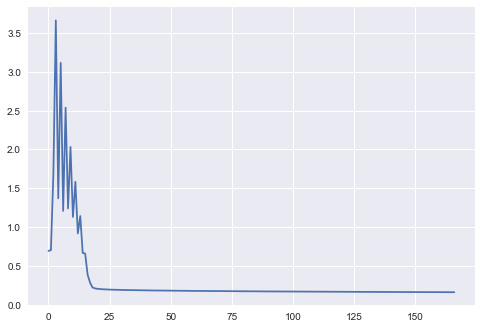

In [12]:
plt.plot(clf.loss_array)

In [ ]:
clf = MAPEstimator(w_D = np.zeros(166), step_size=0.000001, alpha=0.000001, max_iter = 10000000, tol = -1, step_size_type = 'differential')
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [ ]:
score = clf.score(X_std, y)
score

In [ ]:
(np.sum(y==0)) / len(y)

In [ ]:
clf.iteration_count

In [ ]:
plt.plot(clf.loss_array)

Model Evaluation

In [69]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

10

In [72]:
#First-Order Gradient Descent K-fold cross validation

iteration_counts = []
iteration_times = []
test_scores = []
threshold = 0.5

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(166), solver='fo', step_size=0.0001, alpha=1, max_iter = 1000, tol = 0.00001)
    start_time = time.time()
    clf.fit(X_train,y_train)
    end_time = time.time()
    converge_time = end_time - start_time
    iteration_times.append(converge_time)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test, threshold)
    test_scores.append(score)

In [73]:
test_scores

[0.9363636363636364,
 0.9303030303030303,
 0.9378787878787879,
 0.9363636363636364,
 0.9393939393939394,
 0.9393939393939394,
 0.9333333333333333,
 0.9468892261001517,
 0.9590288315629742,
 0.9438543247344461]

In [74]:
iteration_counts

[901, 923, 895, 913, 915, 898, 898, 896, 919, 936]

In [75]:
fogd_test_scores = test_scores

In [76]:
fogd_iteration_counts = iteration_counts

In [77]:
fogd_iteration_times = iteration_times

In [ ]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

In [ ]:
# iteration_counts = []
# test_scores = []

# for train_index, test_index in kf.split(X_std, y):
#     X_train, X_test = X_std[train_index], X_std[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     clf = MAPEstimator(w_D = np.zeros(X.shape[1]), step_size=0.1, alpha=0.1, max_iter = 10000000, step_size_type = 'differential')
#     clf.fit(X_train,y_train)
#     iteration_counts.append(clf.iteration_count)
#     score = clf.score(X_test, y_test)
#     test_scores.append(score)
    

In [ ]:
clf = MAPEstimator(w_D = np.zeros(166), solver='so', step_size=0.0001, alpha=1, max_iter = 1000, tol = 0.00001)
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [103]:
x_axis = []
y_axis = []
for i in np.linspace(0.1,0.3,10):
    clf = MAPEstimator(w_D = np.zeros(166), solver='so', step_size=i, alpha=1, max_iter = 100, tol = 0.00001)
    clf.fit(X_std,y)
    score = clf.score(X_std, y, 0.5)
    x_axis.append(i)
    y_axis.append(score)
#     print(i,'\t\t\t',score)

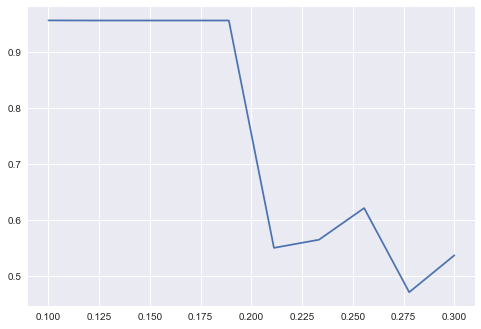

In [104]:
plt.plot(x_axis, y_axis)

In [161]:
#Second-Order Gradient Descent cross validation TBD

iteration_counts = []
iteration_times = []
test_scores = []
threshold = 0.5

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(166), solver='so', step_size=0.1, alpha=1, max_iter = 1000, tol = 0.01)
    start_time = time.time()
    clf.fit(X_train,y_train)
    end_time = time.time()
    converge_time = end_time - start_time
    iteration_times.append(converge_time)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test, threshold)
    test_scores.append(score)

In [162]:
test_scores

[0.9424242424242424,
 0.9378787878787879,
 0.9515151515151515,
 0.9378787878787879,
 0.9454545454545454,
 0.9515151515151515,
 0.9454545454545454,
 0.9559939301972686,
 0.9590288315629742,
 0.9514415781487102]

In [163]:
iteration_counts

[18, 18, 17, 18, 18, 17, 18, 17, 17, 18]

In [164]:
sogd_test_scores = test_scores

In [165]:
sogd_iteration_counts = iteration_counts

In [166]:
sogd_iteration_times = iteration_times

In [167]:
plot_test_scores = np.array([fogd_test_scores, sogd_test_scores])

In [168]:
plot_iteration_counts = np.array([fogd_iteration_counts, sogd_iteration_counts])

In [169]:
plot_iteration_times = np.array([fogd_iteration_times, sogd_iteration_times])

Text(0, 0.5, 'Accuracy Rate on Held-Out Data')

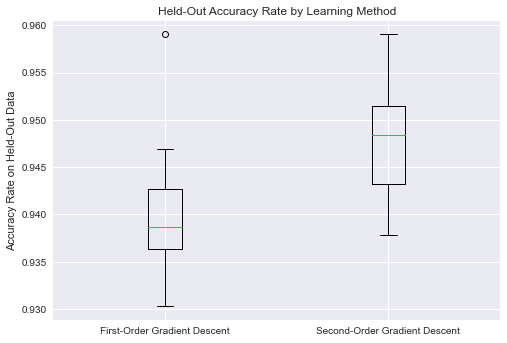

In [180]:
plt.boxplot(np.transpose(plot_test_scores), labels = ['First-Order Gradient Descent', 'Second-Order Gradient Descent'])
plt.title('Held-Out Accuracy Rate by Learning Method')
plt.ylabel('Accuracy Rate on Held-Out Data')

Text(0, 0.5, '# Iterations Until Convergence')

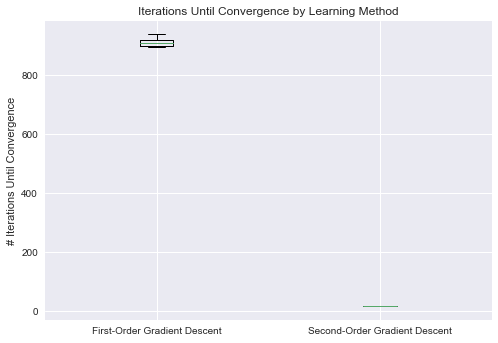

In [179]:
plt.boxplot(np.transpose(plot_iteration_counts), labels = ['First-Order Gradient Descent', 'Second-Order Gradient Descent'])
plt.title('Iterations Until Convergence by Learning Method')
plt.ylabel('# Iterations Until Convergence')

Text(0, 0.5, 'Time Until Convergence (Seconds)')

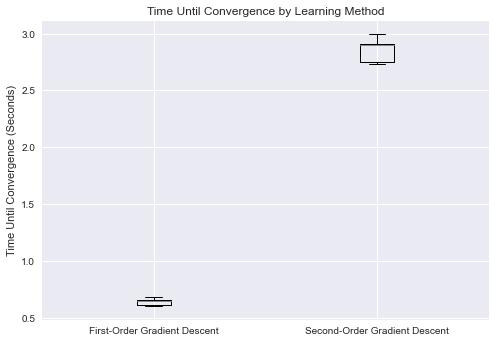

In [177]:
plt.boxplot(np.transpose(plot_iteration_times), labels = ['First-Order Gradient Descent', 'Second-Order Gradient Descent'])
plt.title('Time Until Convergence by Learning Method')
plt.ylabel('Time Until Convergence (Seconds)')

In [ ]:
plt.plot(clf.loss_array)

In [ ]:
clf = LogisticRegression(penalty="none", solver = 'sag', max_iter = 100000)

In [ ]:
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [ ]:
score = clf.score(X_std, y)
score

In [ ]:
sk_weights = clf.coef_[0]

In [ ]:
clf.w_D

In [ ]:
clf.intercept_

In [ ]:
clf.c

In [ ]:
y_pred = clf.predict_proba(X_std)

In [ ]:
RocCurveDisplay.from_predictions(y, y_pred)

In [ ]:
fpr, fnr, thresholds = det_curve(y, y_pred)

In [ ]:
fpr

In [ ]:
plt.plot(thresholds, fpr)
plt.plot(thresholds, fnr)

In [7]:
vec = np.array([1,2,3, 4])

In [10]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([1,2,3])

In [17]:
(a @ b[:,np.newaxis]).shape

(3, 1)